In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from IPython.display import display

In [2]:
df = pd.read_csv(r'C:\Users\grids\Downloads\heartdis.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
df.loc[:,"Sex"]

0         Female
1         Female
2           Male
3         Female
4         Female
           ...  
319790      Male
319791      Male
319792    Female
319793    Female
319794    Female
Name: Sex, Length: 319795, dtype: object

# 1. Changing the columns into numeric

In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<Axes: xlabel='HeartDisease', ylabel='count'>

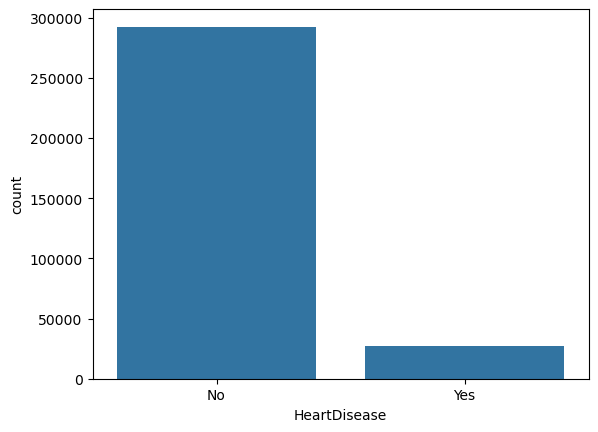

In [8]:
sns.countplot(x=df['HeartDisease'])

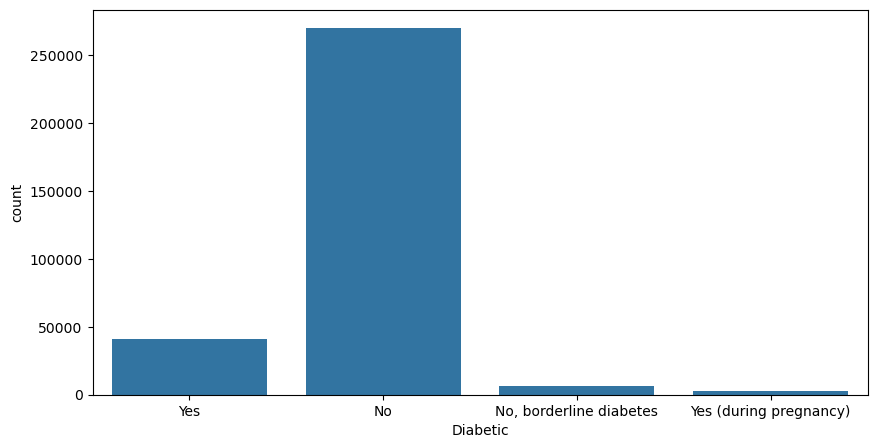

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Diabetic'])
plt.show()

<Axes: xlabel='AlcoholDrinking', ylabel='count'>

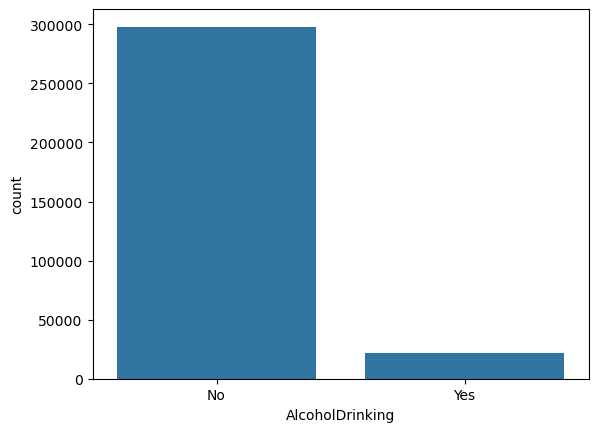

In [10]:
sns.countplot(x=df['AlcoholDrinking'])

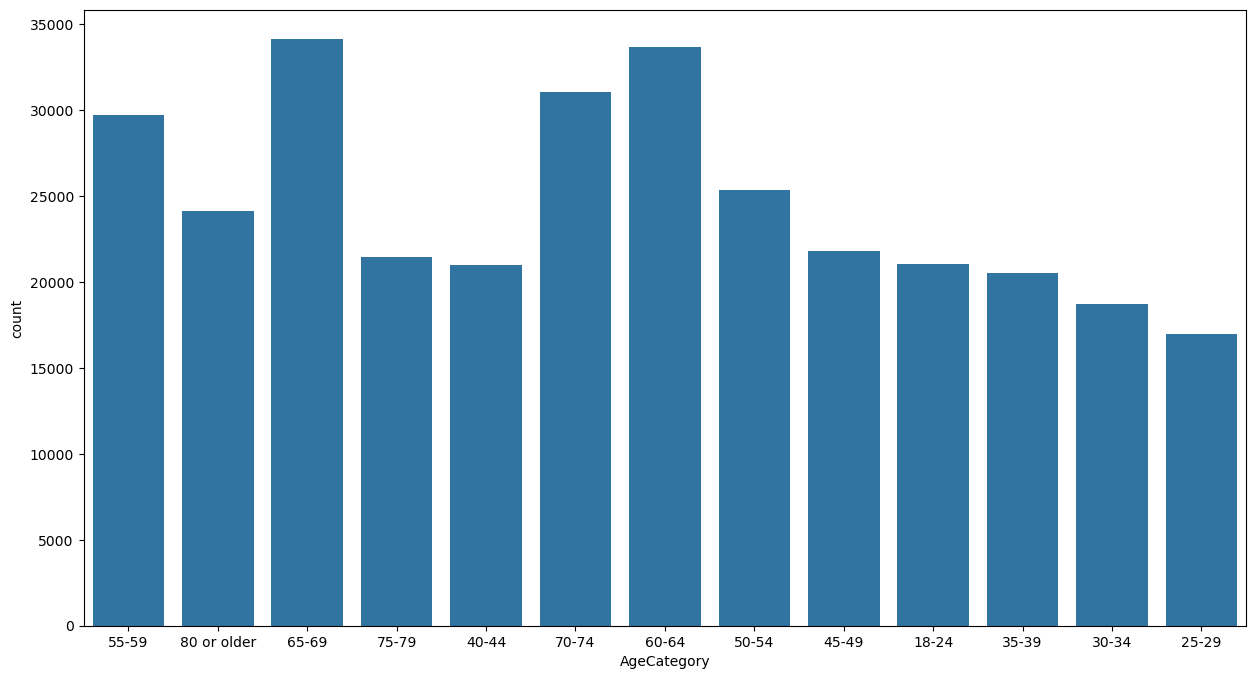

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['AgeCategory'])
plt.show()

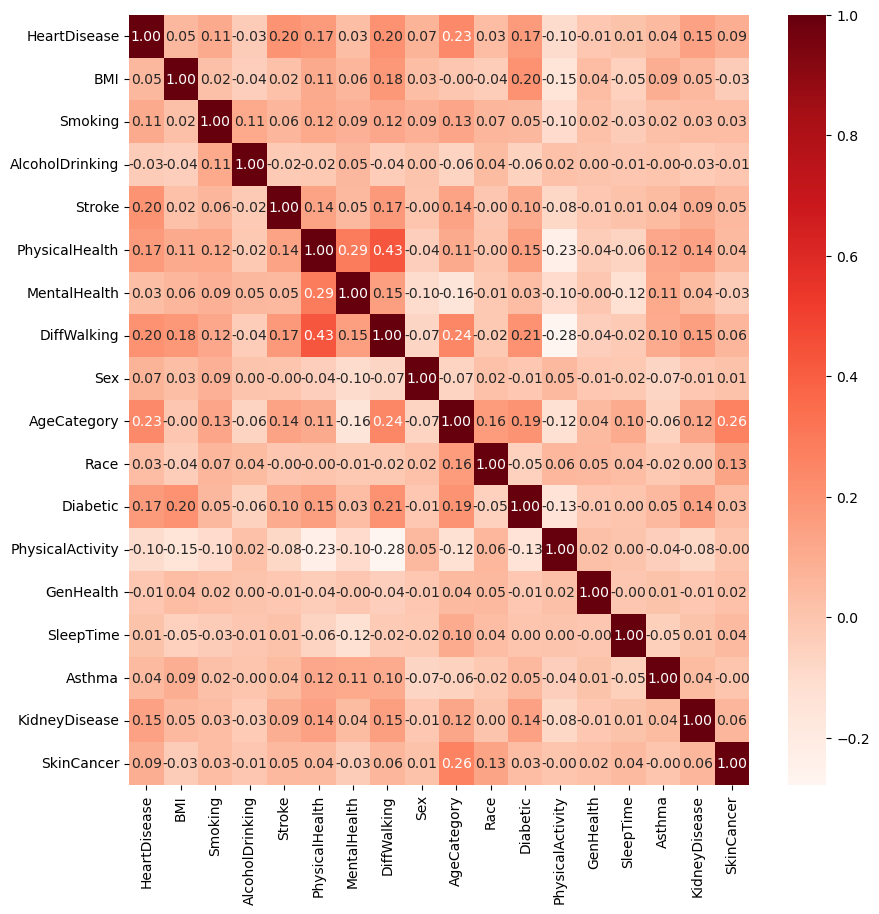

In [12]:
# Convert categorical columns to numeric
for i in df.columns:
	if df[i].dtype == "object":
		df[i] = df[i].astype('category').cat.codes

plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Reds', fmt='.2f')
plt.show()

In [13]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [14]:
df.dtypes

HeartDisease           int8
BMI                 float64
Smoking                int8
AlcoholDrinking        int8
Stroke                 int8
PhysicalHealth        int64
MentalHealth          int64
DiffWalking            int8
Sex                    int8
AgeCategory            int8
Race                   int8
Diabetic               int8
PhysicalActivity       int8
GenHealth              int8
SleepTime             int64
Asthma                 int8
KidneyDisease          int8
SkinCancer             int8
dtype: object

In [15]:
df.isnull().sum().sum()

0

In [16]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [17]:
#Putting Feature Variable to X
X = df.drop('HeartDisease',axis=1)

#putting Response variable to y
y = df['HeartDisease']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=100)
X_train.shape, X_test.shape

((255836, 17), (63959, 17))

#### Fitting the decision tree with deafualt hyperparameters, apart from max_dept whoch is 3 so that we can plot and read the tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
%pip install six
%pip install graphviz
%pip install pydotplus


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
# importing required package for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

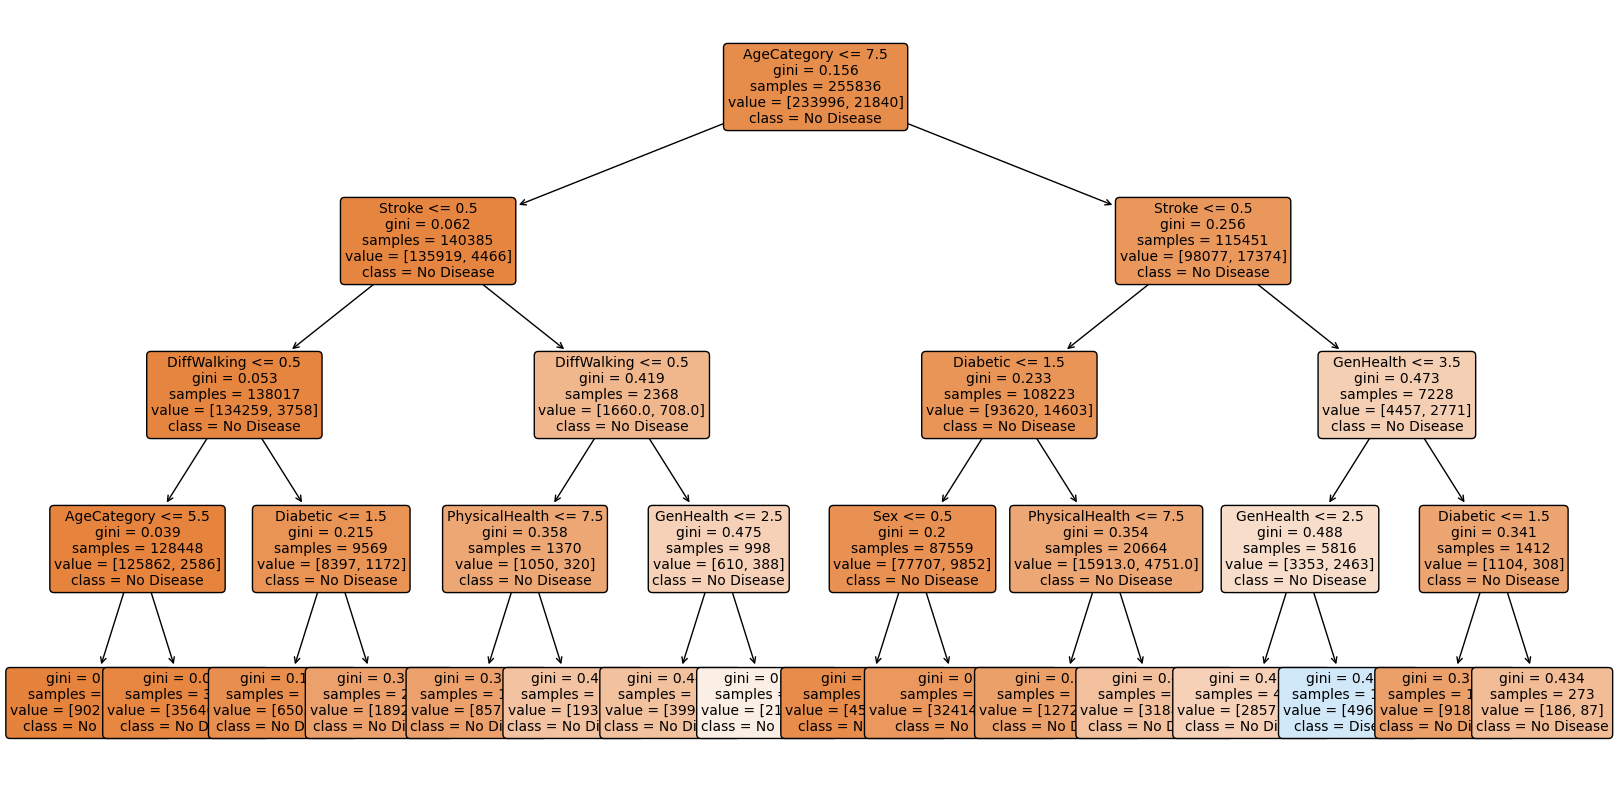

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, fontsize=10)
plt.show()

#### Evaluating model performance

In [25]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.915211307243703


array([[233500,    496],
       [ 21196,    644]], dtype=int64)

In [28]:
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.9143201113213152


array([[58324,   102],
       [ 5378,   155]], dtype=int64)

Creating helper functions to evaluate model performance and help plot decision tree

In [29]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                   feature_names=X.columns,
                   class_names=['Disease','No Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [30]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

## Without setting any hyper - parameters

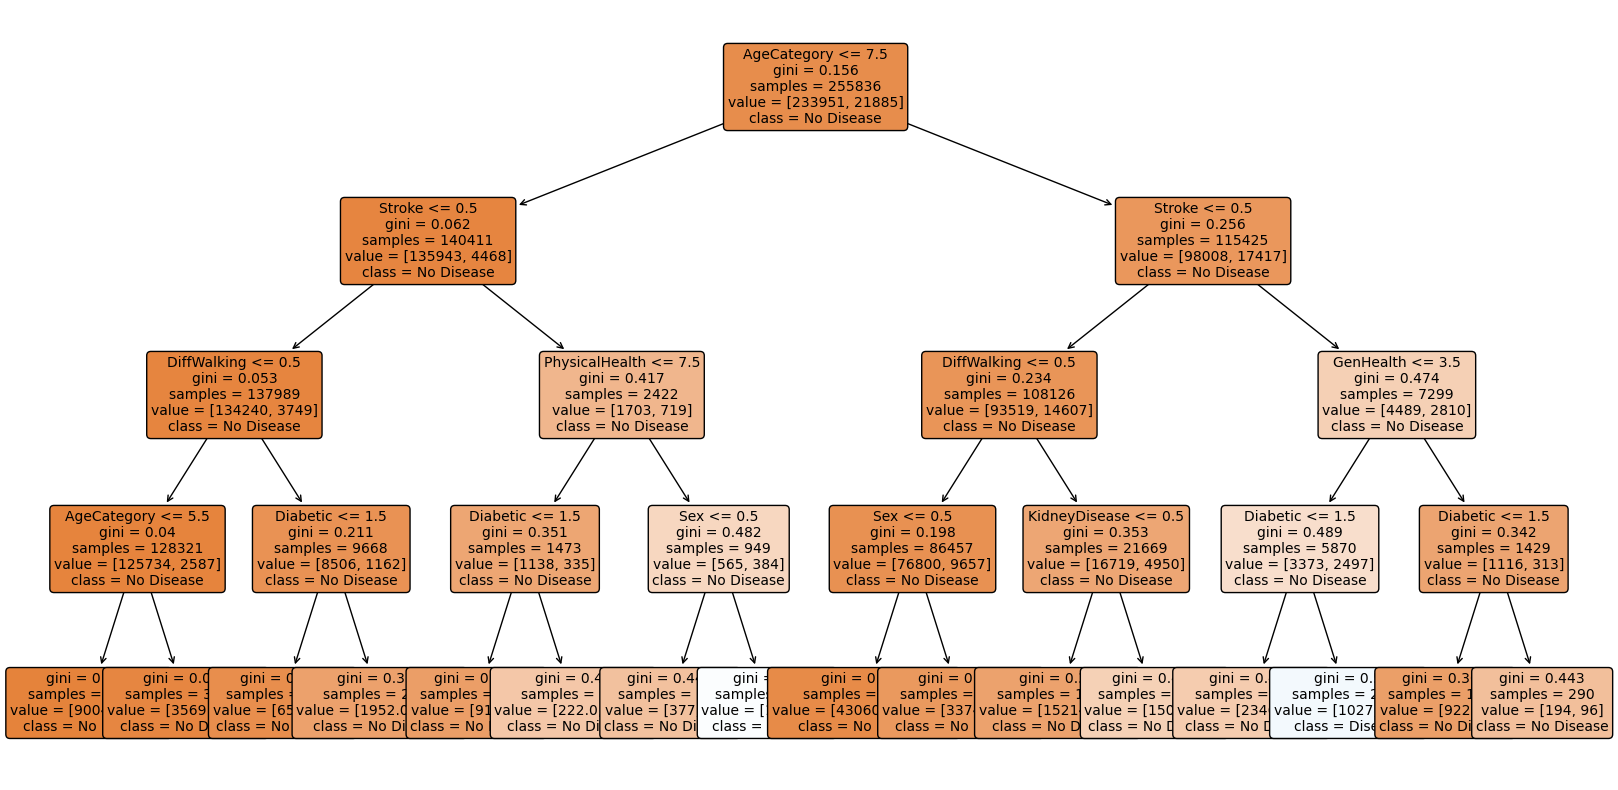


Accuracy: 0.9145233665316843

Confusion Matrix:
 [[58180   291]
 [ 5176   312]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58471
           1       0.52      0.06      0.10      5488

    accuracy                           0.91     63959
   macro avg       0.72      0.53      0.53     63959
weighted avg       0.88      0.91      0.88     63959



In [31]:
# ----------------------------------------------------
# IMPORTS
# ----------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------------------------------
# TRAIN/TEST SPLIT
# (Assuming X and y are already defined in your notebook)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# ----------------------------------------------------
# YOUR MODEL (with small fix: limit depth to prevent huge plot)
# ----------------------------------------------------
dt_default = DecisionTreeClassifier(
    random_state=4,
    max_depth=4   # <-- THIS prevents the 15-minute plot freeze
)

dt_default.fit(X_train, y_train)

# ----------------------------------------------------
# PLOT TREE (your code, but optimized)
# ----------------------------------------------------
plt.figure(figsize=(20,10))
plot_tree(
    dt_default,
    feature_names=X.columns,
    class_names=['No Disease','Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# ----------------------------------------------------
# EVALUATE MODEL (your function - recreated)
# ----------------------------------------------------
def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(dt_default)

In [32]:
# dt_default = DecisionTreeClassifier(random_state=4)
# dt_default.fit(X_train,y_train)

In [33]:
# from sklearn.tree import plot_tree
# # Use sklearn's plot_tree to avoid GraphViz executable dependency
# plt.figure(figsize=(20,10))
# plot_tree(dt_default, feature_names=X.columns, class_names=['No Disease','Disease'],
# 		  filled=True, rounded=True, fontsize=10)
# plt.show()

In [34]:
# evaluate_model(dt_default)

### Controlling the depth of the tree

In [35]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [36]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

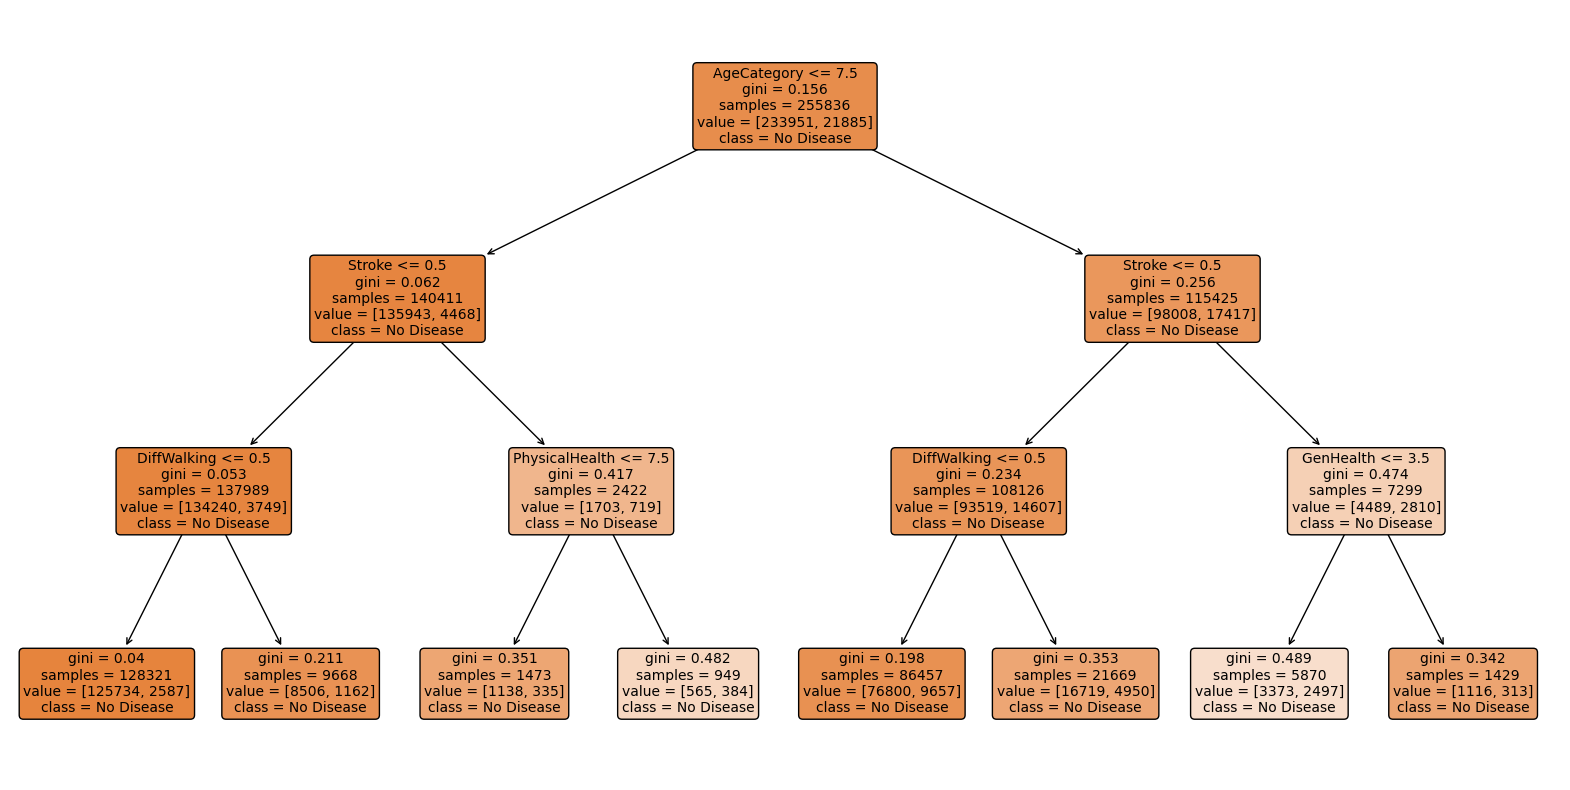

In [37]:
from sklearn.tree import plot_tree
# Use sklearn's plot_tree to avoid GraphViz executable dependency
plt.figure(figsize=(20,10))
plot_tree(dt_depth, feature_names=X.columns, class_names=['No Disease','Disease'],
		  filled=True, rounded=True, fontsize=10)
plt.show()

In [38]:
evaluate_model(dt_depth)


Accuracy: 0.9141950311918573

Confusion Matrix:
 [[58471     0]
 [ 5488     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     58471
           1       0.00      0.00      0.00      5488

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959



c:\Users\grids\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\grids\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\grids\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Specifying minimum samples before split

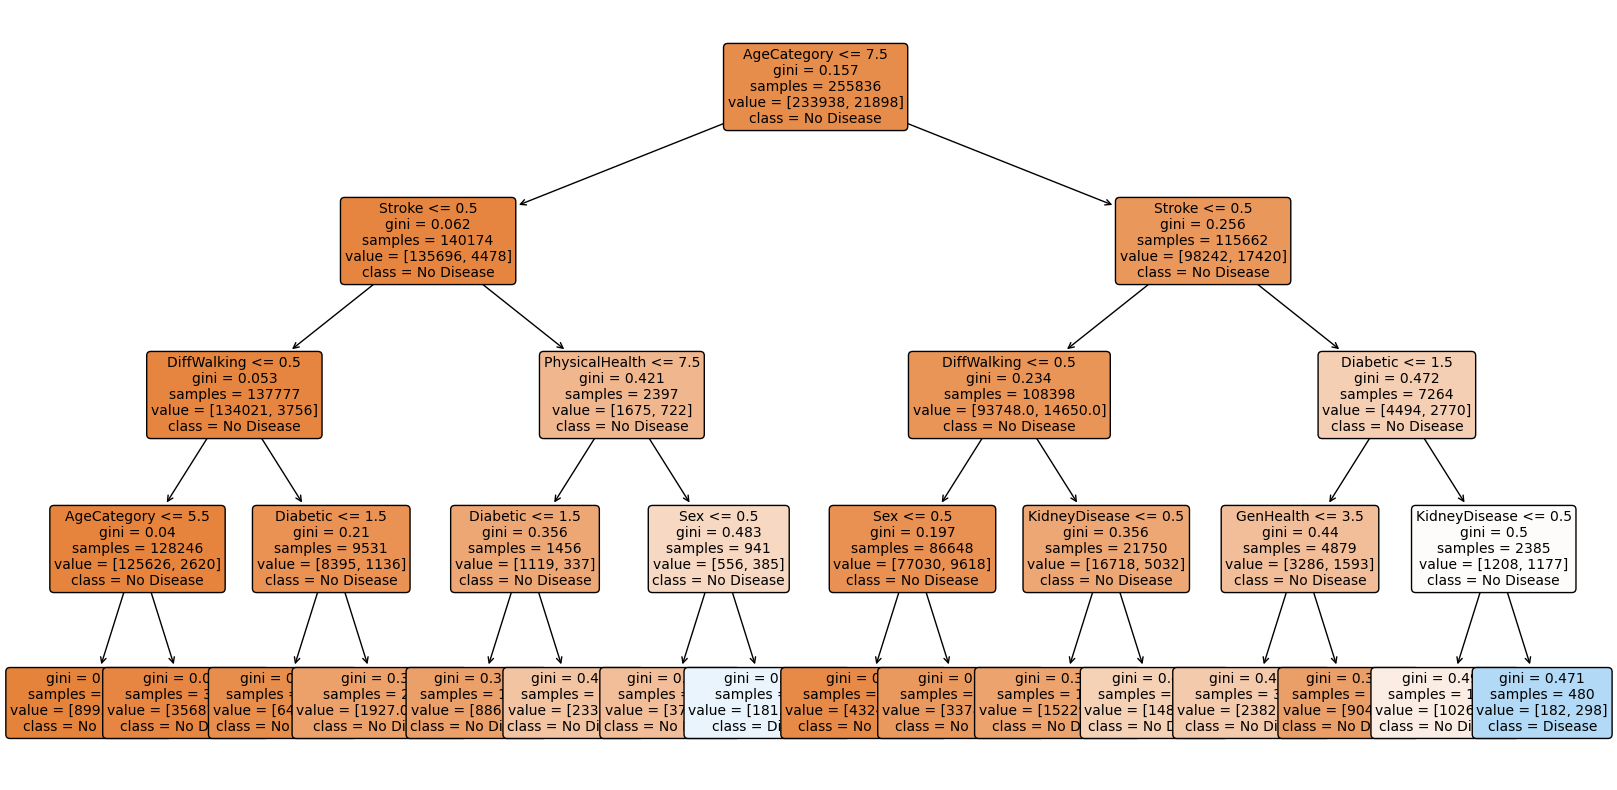


Accuracy: 0.9145859065964134

Confusion Matrix:
 [[58384   100]
 [ 5363   112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58484
           1       0.53      0.02      0.04      5475

    accuracy                           0.91     63959
   macro avg       0.72      0.51      0.50     63959
weighted avg       0.88      0.91      0.88     63959



In [39]:
# ----------------------------------------------------
# IMPORTS
# ----------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------------------------------
# TRAIN/TEST SPLIT
# (Assuming X and y are already defined in your notebook)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# ----------------------------------------------------
# YOUR MODEL (with small fix: limit depth to prevent huge plot)
# ----------------------------------------------------
dt_min_split = DecisionTreeClassifier(
    random_state=4,
    max_depth=4   # <-- THIS prevents the 15-minute plot freeze
)

dt_min_split.fit(X_train, y_train)

# ----------------------------------------------------
# PLOT TREE (your code, but optimized)
# ----------------------------------------------------
plt.figure(figsize=(20,10))
plot_tree(
    dt_min_split,
    feature_names=X.columns,
    class_names=['No Disease','Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# ----------------------------------------------------
# EVALUATE MODEL (your function - recreated)
# ----------------------------------------------------
def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(dt_min_split)


In [40]:
# dt_min_split = DecisionTreeClassifier(min_samples_split=20)
# dt_min_split.fit(X_train, y_train)

In [41]:
# from sklearn.tree import plot_tree
# # Use sklearn's plot_tree to avoid GraphViz executable dependency
# plt.figure(figsize=(20,10))
# plot_tree(dt_min_split, feature_names=X.columns, class_names=['No Disease','Disease'],
# 		  filled=True, rounded=True, fontsize=10)
# plt.show()

In [42]:
# evaluate_model(dt_min_split)

In [43]:
decisionn_tree_name=DecisionTreeClassifier(max_depth=3,min_samples_split=20,min_samples_leaf=20,)

### Specifying minimum samples in leaf node

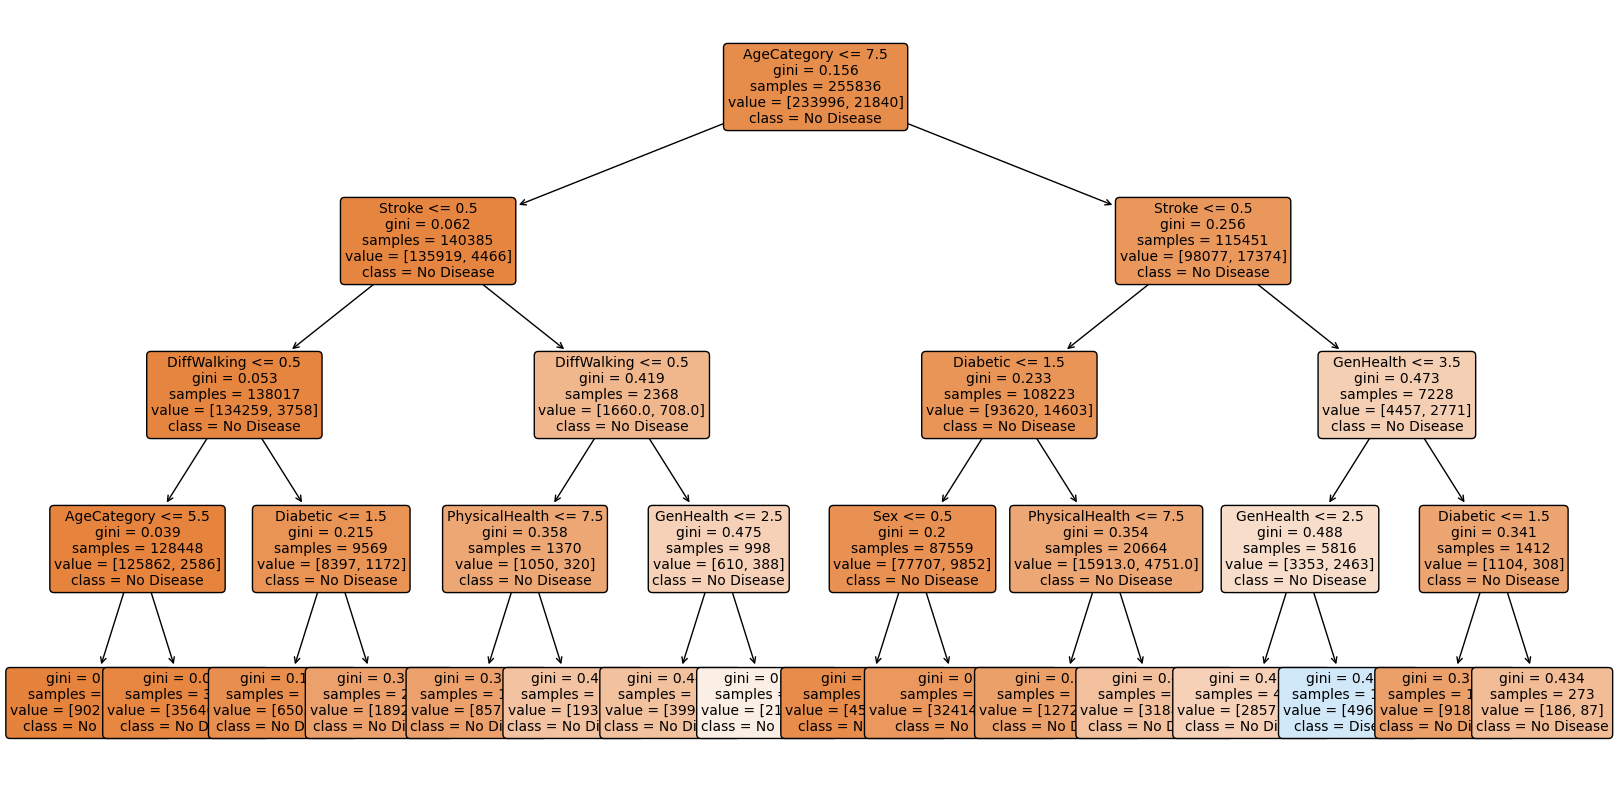


Accuracy: 0.9143201113213152

Confusion Matrix:
 [[58324   102]
 [ 5378   155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58426
           1       0.60      0.03      0.05      5533

    accuracy                           0.91     63959
   macro avg       0.76      0.51      0.50     63959
weighted avg       0.89      0.91      0.88     63959



In [44]:
# ----------------------------------------------------
# IMPORTS
# ----------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------------------------------
# TRAIN/TEST SPLIT
# (Assuming X and y are already defined in your notebook)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# ----------------------------------------------------
# YOUR MODEL (with small fix: limit depth to prevent huge plot)
# ----------------------------------------------------
dt_min_leaf = DecisionTreeClassifier(
    random_state=4,
    max_depth=4   # <-- THIS prevents the 15-minute plot freeze
)

dt_min_leaf.fit(X_train, y_train)

# ----------------------------------------------------
# PLOT TREE (your code, but optimized)
# ----------------------------------------------------
plt.figure(figsize=(20,10))
plot_tree(
    dt_min_leaf,
    feature_names=X.columns,
    class_names=['No Disease','Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# ----------------------------------------------------
# EVALUATE MODEL (your function - recreated)
# ----------------------------------------------------
def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(dt_min_leaf)

In [45]:
# dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=100)
# dt_min_leaf.fit(X_train,y_train)

In [46]:
# from sklearn.tree import plot_tree
# # Use sklearn's plot_tree to avoid GraphViz executable dependency
# plt.figure(figsize=(20,10))
# plot_tree(dt_min_leaf, feature_names=X.columns, class_names=['No Disease','Disease'],
# 		  filled=True, rounded=True, fontsize=10)
# plt.show()

In [47]:
# evaluate_model(dt_min_leaf)

### Using Entropy instead of Gini

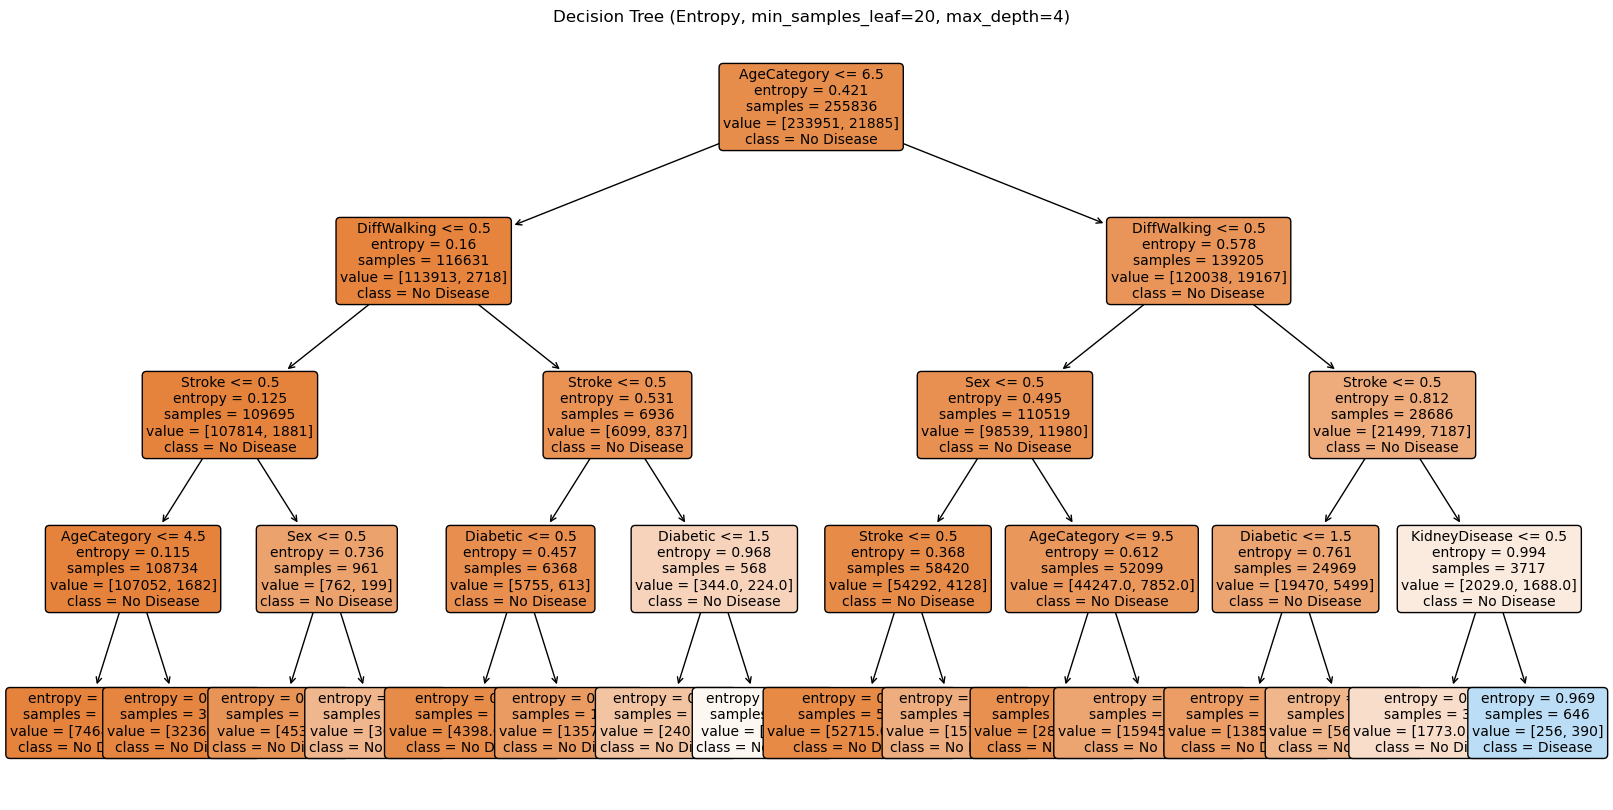


Accuracy: 0.914820431839147

Confusion Matrix:
 [[58409    62]
 [ 5386   102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58471
           1       0.62      0.02      0.04      5488

    accuracy                           0.91     63959
   macro avg       0.77      0.51      0.50     63959
weighted avg       0.89      0.91      0.88     63959



In [48]:
# ----------------------------------------------------
# IMPORTS
# ----------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## ----------------------------------------------------
# TRAIN/TEST SPLIT (assuming X and y already exist)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4
)

# ----------------------------------------------------
# YOUR MODEL (with optional depth limit for plotting)
# ----------------------------------------------------
dt_min_leaf_entropy = DecisionTreeClassifier(
    min_samples_leaf=20,
    random_state=100,
    criterion="entropy",
    max_depth=4       # <-- ADD THIS so plot_tree doesn't take 15+ minutes
)

dt_min_leaf_entropy.fit(X_train, y_train)

# ----------------------------------------------------
# PLOT THE TREE (fast & readable)
# ----------------------------------------------------
plt.figure(figsize=(20,10))
plot_tree(
    dt_min_leaf_entropy,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Entropy, min_samples_leaf=20, max_depth=4)")
plt.show()

# ----------------------------------------------------
# MODEL EVALUATION FUNCTION
# ----------------------------------------------------
def evaluate_model(model):
    y_pred = model.predict(X_test)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------------------------
# EVALUATE YOUR MODEL
# ----------------------------------------------------
evaluate_model(dt_min_leaf_entropy)


In [49]:
# dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=100, criterion="entropy")
# dt_min_leaf_entropy.fit(X_train, y_train)

In [50]:
# from sklearn.tree import plot_tree
# # Use sklearn's plot_tree to avoid GraphViz executable dependency
# plt.figure(figsize=(20,10))
# plot_tree(dt_min_leaf_entropy, feature_names=X.columns, class_names=['No Disease','Disease'],
# 		  filled=True, rounded=True, fontsize=10)
# plt.show()

In [51]:
# evaluate_model(dt_min_leaf_entropy)

### Hyper-parameter tuning

In [52]:
dt = DecisionTreeClassifier(random_state=100)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# create the parameter grid based on the results of random search
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':["gini","entropy"]
}

In [55]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [56]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 11.9 s
Wall time: 1min 8s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [57]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.513831,0.122540,0.033635,0.000595,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914461,0.914461,0.914461,0.914445,0.914457,0.000007,17
1,0.604543,0.072782,0.035309,0.004679,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914461,0.914461,0.914461,0.914445,0.914457,0.000007,17
2,0.643634,0.086899,0.037899,0.004048,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914461,0.914461,0.914461,0.914445,0.914457,0.000007,17
3,0.591478,0.117871,0.036876,0.003822,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914461,0.914461,0.914461,0.914445,0.914457,0.000007,17
4,1.016106,0.131479,0.043842,0.007595,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.914461,0.914461,0.914461,0.914445,0.914457,0.000007,17


In [58]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
44,3.089064,0.444528,0.054351,0.009451,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915461,0.915727,0.914695,0.914430,0.915078,0.000533,1
35,2.216523,0.395459,0.059332,0.015195,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915133,0.914977,0.914883,0.914836,0.914957,0.000113,2
49,2.854973,0.389199,0.056907,0.011827,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.914946,0.915618,0.914758,0.914445,0.914942,0.000429,3
39,2.578262,0.375648,0.056415,0.008785,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915102,0.914977,0.915071,0.914602,0.914938,0.000199,4
38,2.667526,0.872304,0.076177,0.014841,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915133,0.914930,0.914883,0.914758,0.914926,0.000135,5


In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       random_state=100)

In [60]:
dt_test = grid_search.best_estimator_

In [61]:
evaluate_model(dt_test)


Accuracy: 0.9148829719038759

Confusion Matrix:
 [[58175   296]
 [ 5148   340]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58471
           1       0.53      0.06      0.11      5488

    accuracy                           0.91     63959
   macro avg       0.73      0.53      0.53     63959
weighted avg       0.89      0.91      0.88     63959



In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, dt_test.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58471
           1       0.53      0.06      0.11      5488

    accuracy                           0.91     63959
   macro avg       0.73      0.53      0.53     63959
weighted avg       0.89      0.91      0.88     63959



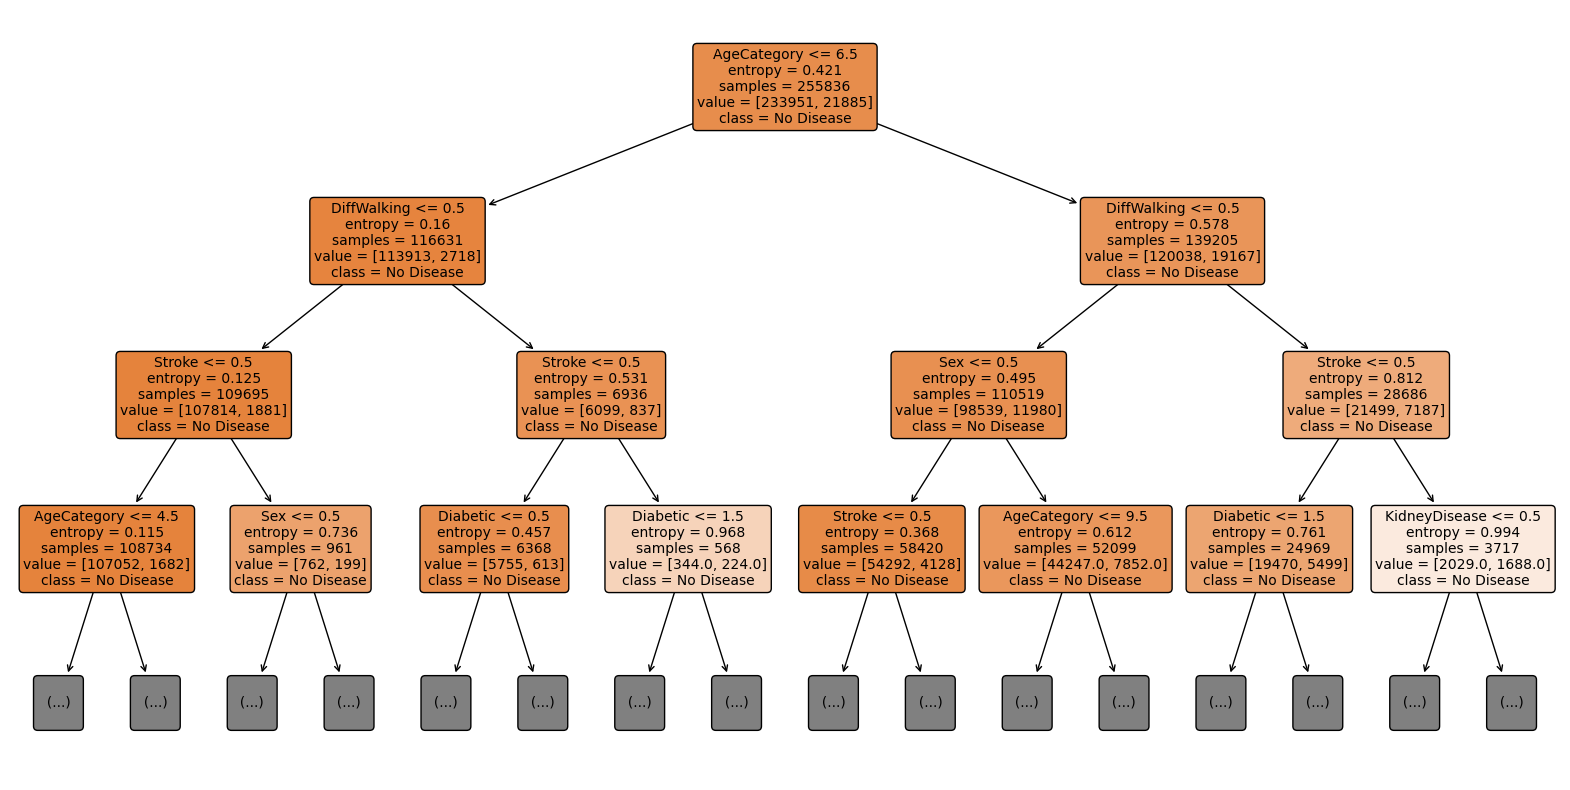

In [64]:
from sklearn.tree import plot_tree
# Use sklearn's plot_tree to avoid GraphViz executable dependency
plt.figure(figsize=(20,10))
plot_tree(
    dt_test,
    feature_names=X.columns,
    class_names=['No Disease','Disease'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # <-- ONLY SHOW TOP 3 LEVELS (clear & readable)
)
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(random_state=100, n_estimators=10, max_depth=5)

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=100)

In [68]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=186422792)

In [69]:
samples_tree = rf.estimators_[4]

In [70]:
print(samples_tree)

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1823289175)


In [71]:
evaluate_model(rf)


Accuracy: 0.91463281164496

Confusion Matrix:
 [[58455    16]
 [ 5444    44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     58471
           1       0.73      0.01      0.02      5488

    accuracy                           0.91     63959
   macro avg       0.82      0.50      0.49     63959
weighted avg       0.90      0.91      0.87     63959

